In [100]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs
import cmaps
from matplotlib import cm, colors, ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pylab as pl
data_dir='/Users/hass877/Work/data_analysis/'
era_orig = xr.open_dataset(data_dir+'e5.oper.an.pl.128_133_q.ll025sc.2015010100_2015010123.nc')
era_orig = era_orig.rename({'latitude':'lat','longitude':'lon'})
era_nud_compy = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72.2015-01-01-00000_compy.nc',decode_times=False)
era_nud_cori = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72.2015-01-01-00000_cori.nc',decode_times=False)
# Column mean T (K)
orig = era_orig['Q'][0][-1]
compy = era_nud_compy['Q'][0][-1]
cori = era_nud_cori['Q'][0][-1]
## grid
grid_data = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_2000_c20191108_384x576_ne30pg2.nc')
lat = grid_data['lat']
lon = grid_data['lon']

In [124]:
# Func to plot
def get_plot(T_orig, ax):
    pl=plt.pcolormesh(T_orig.lon,T_orig.lat,T_orig,\
                norm=colors.LogNorm(vmin=T_orig.min(),vmax=T_orig.max()),\
                    cmap=cmaps.WhiteBlueGreenYellowRed,transform=crs.PlateCarree(),shading='auto')
    ax.set_global()
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    return pl
# Func to plot SE data
def get_se_plot(lat,lon,era_ml_U,ax,ml='ml',ptype='pcolor'):
    new_lon = lon.copy(deep=True)
    new_lon.values = np.where(lon > 180, lon - 360, lon)
    ml_lon = new_lon.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    ml_lat = lat.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    era_ml_U = era_ml_U.squeeze().dropna('ncol')
    ax.set_global()
    ax.coastlines()
    if ptype=='pcolor':
        pl=ax.tripcolor(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.LogNorm(vmin=era_ml_U.min(),vmax=era_ml_U.max()),\
                    cmap=cmaps.WhiteBlueGreenYellowRed)
    else:
        pl=ax.tricontourf(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.LogNorm(vmin=220,vmax=320),\
                    cmap=cmaps.WhiteBlueGreenYellowRed)
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    #plt.title('U '+ml+' ['+str(np.round(era_ml_U.lev.values,2))+'hpa]')
    return pl

/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

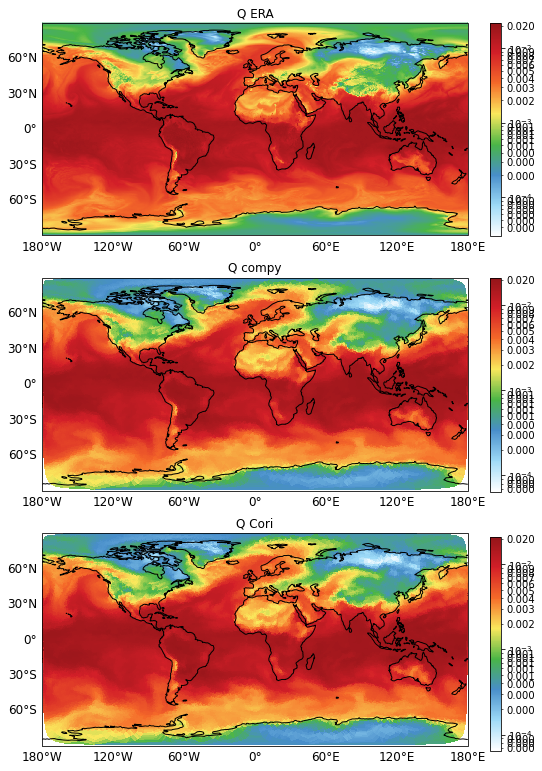

In [125]:
plt.figure(figsize=(8,18))
#ax=plt.subplot(4,1,1)
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_plot(orig, ax)
plt.title('Q ERA')
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax)
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,compy,ax)
plt.title('Q compy')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,cori,ax)
plt.title('Q Cori')
cax=plt.axes([0.92,0.318,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

In [126]:
## NA RRM compare with original ERA 201501
data_dir='/Users/hass877/Work/data_analysis/'
era_orig = xr.open_dataset(data_dir+'e5.oper.an.pl.128_133_q.ll025sc.2015010100_2015010123.nc')
era_orig = era_orig.rename({'latitude':'lat','longitude':'lon'})
era_nud_compy = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72.2015-01-01-00000_compy.nc',decode_times=False)
era_nud_cori = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72_northamericax4v1pg2.2015-01-01-00000_cori.nc',decode_times=False)
era_nud_compy = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72_northamericax4v1pg2.2015-01-01-00000_compy.nc',decode_times=False)
# Column mean T (K)
orig = era_orig['Q'][0][-1]
compy = era_nud_compy['Q'][0][-1]
cori = era_nud_cori['Q'][0][-1]
## grid
grid_data = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_1850_c20191108_384x576_northamericax4v1pg2.nc')
lat = grid_data['lat']
lon = grid_data['lon']

/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

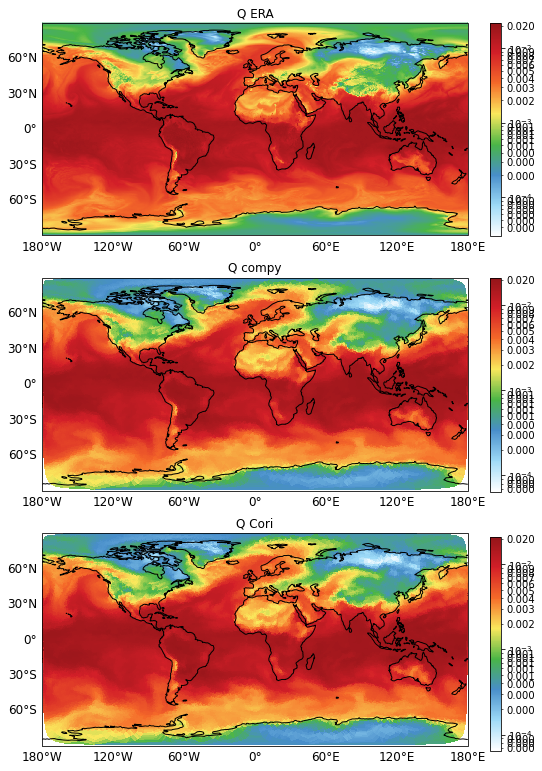

In [127]:
plt.figure(figsize=(8,18))
#ax=plt.subplot(4,1,1)
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_plot(orig, ax)
plt.title('Q ERA')
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax)
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,compy,ax)
plt.title('Q compy')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,cori,ax)
plt.title('Q Cori')
cax=plt.axes([0.92,0.318,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

In [120]:
## NA RRM comparison with SZ 200904 data
data_dir='/Users/hass877/Work/data_analysis/'
era_orig = xr.open_dataset(data_dir+'ERA5_721x1440_to_E3SM_ne30pg2_L72_northamericax4v1pg2.2009-04-01-00000.nc',decode_times=False)
era_nud_compy = xr.open_dataset(data_dir+'ERA5_ne30pg2_L72_northamericax4v1pg2.2009-04-01-00000_compy.nc',decode_times=False)
# Column mean T (K)
SZ = era_orig['T'][0][-1]
compy = era_nud_compy['T'][0][-1]
SZ_U = era_orig['Q'][0][-1]
compy_U = era_nud_compy['Q'][0][-1]
## grid
grid_data = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_1850_c20191108_384x576_northamericax4v1pg2.nc')
lat = grid_data['lat']
lon = grid_data['lon']

/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hass877/miniconda/envs/work/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

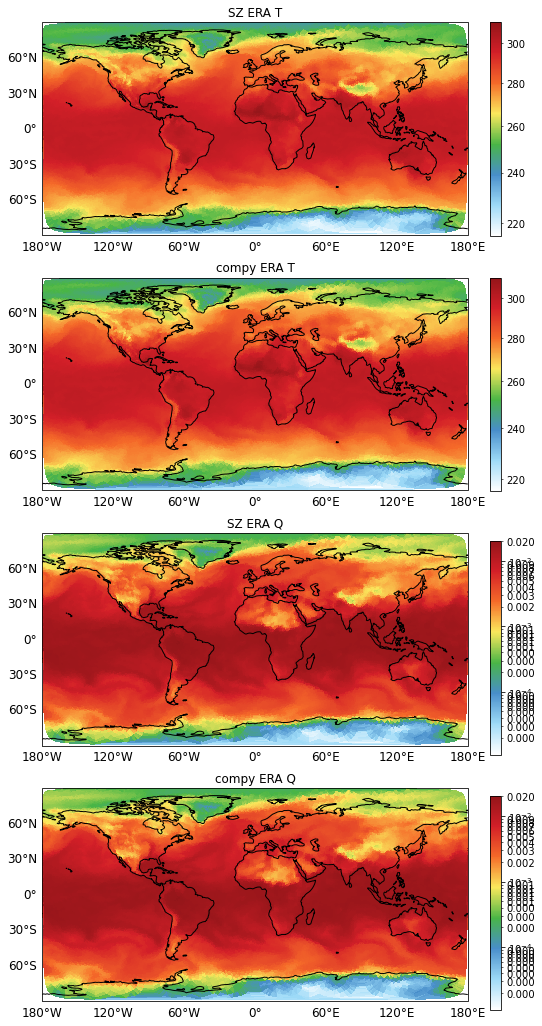

In [121]:
plt.figure(figsize=(8,18))
#ax=plt.subplot(4,1,1)
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,SZ,ax)
plt.title('SZ ERA T')
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax)
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,compy,ax)
plt.title('compy ERA T')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,SZ_U,ax)
plt.title('SZ ERA Q')
cax=plt.axes([0.92,0.315,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax)
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
##
ax=plt.subplot(414,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,compy_U,ax)
plt.title('compy ERA Q')
cax=plt.axes([0.92,0.118,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())